In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize 
from numpy.linalg import inv

In [27]:
def neg_log_likelihood_gamma(beta, X, Y):
    theta = np.dot(X, beta)
    mu = np.log(theta)
    return - np.sum(- (Y * theta) + mu)

def neg_log_likelihood_gamma2(beta, X, Y):
    theta = np.dot(X, beta)
    mu = 1 / theta
    return - np.sum(- (Y * theta) + mu)




EJERCICIO 7

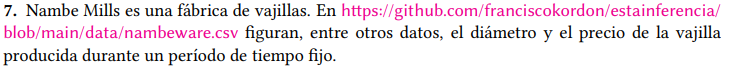

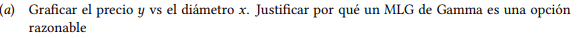

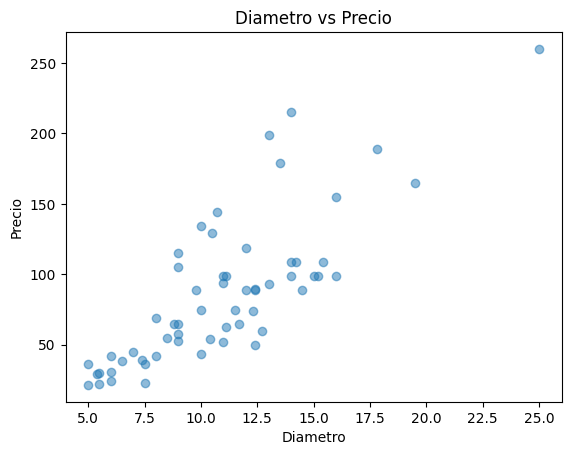

In [22]:
vajilla = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/2C 2024/GUIAS/nambeware.csv")

plt.scatter(vajilla["Diam"], vajilla["Price"], alpha=0.5)
plt.xlabel('Diametro')
plt.ylabel('Precio')
plt.title('Diametro vs Precio')
plt.show()



podria plantearse un modelo gamma porqeu esta funcion permite determinar valores continuos positivos y se asemeja a una exponencial cuando lambda = 1, que es la distribucion que pareciera observarse.

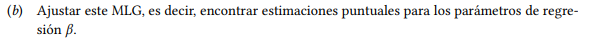

b0 =  nan
b1 =  nan


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9108\2670038657.py:26: RuntimeWarning: divide by zero encountered in log
  mu = np.log(theta)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_optimize.py:1492: RuntimeWarning: invalid value encountered in scalar add
  old_old_fval = old_fval + np.linalg.norm(gfk) / 2


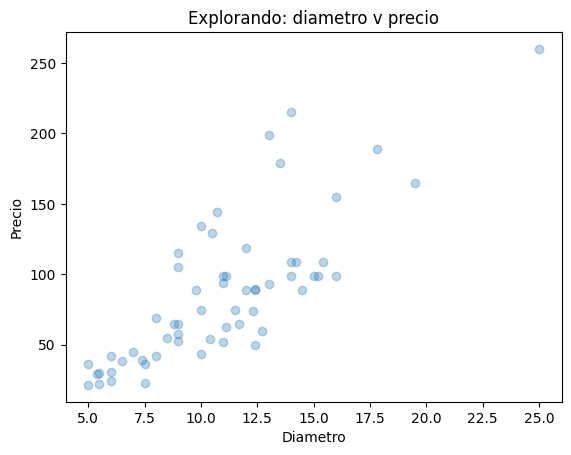

In [29]:
X = vajilla["Diam"].values
Y = vajilla["Price"].values

intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.zeros(X_with_intercept.shape[1])
res_gamma = minimize(neg_log_likelihood_gamma, initial_beta, args=(X_with_intercept, Y))

b0 = res_gamma.x[0]
b1 = res_gamma.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
gamma_fit = np.exp(b0 + b1 * x_range)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.3)
ax.plot(x_range,gamma_fit,color='g')
ax.set_xlabel("Diametro")
ax.set_ylabel("Precio")
ax.set_title("Explorando: diametro v precio")
plt.show()